Assignment-04

Simple Linear Regression-1

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
dataset=pd.read_csv('https://github.com/rushikeshw791/Simple-linear-regression-1/files/9693212/delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Step : 1**

Performing EDA on Data

In [ ]:
# renaming columns
dataset1 = dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
# checking datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
# checking for null values
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
# checking for duplicate values
dataset[dataset.duplicated()].shape

(0, 2)

In [ ]:
dataset[dataset.duplicated()]

,Delivery Time,Sorting Time


**Step : 2** 

Plotting the data to check for outliers

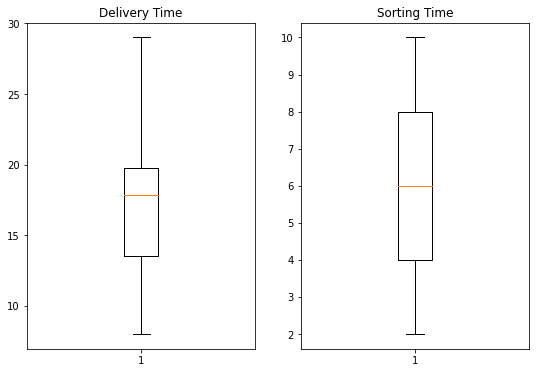

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dataset['Sorting Time'])
plt.title('Sorting Time')
plt.show()

there are no outliers in the data

In [ ]:
# checking the correlation 
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Visualization of correlation between x and y


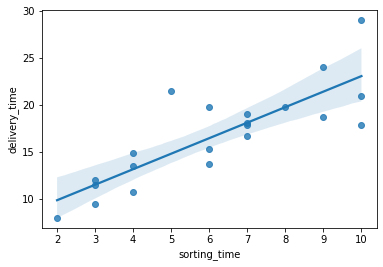

In [ ]:
# regression plot
sns.regplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])

from this plot we can see that

1.good correlation between the two variables

2.the score is more than 0.8 is good

**Step : 3**


Checking for Homoscedasticity or Hetroscedasticity

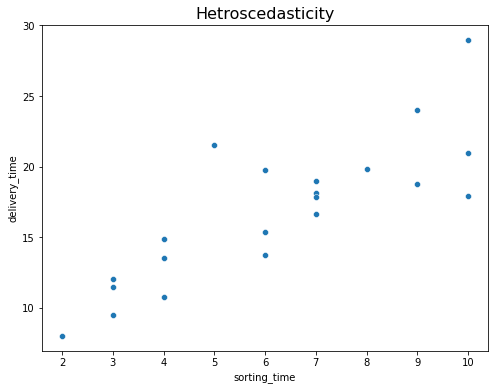

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])
plt.title('Hetroscedasticity',fontsize=16)
plt.show()

In [ ]:
dataset.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

the graph shows that

1. It shows that sorting time increases delivery time also increases with variation.

2. The data doesn't have any specific pattern in the variation,but the variation is homoscedasticity

**Step : 4**

Feature engineering

In [ ]:
# Trying different transformation of data to estimate normal distribution and to remove any skewness

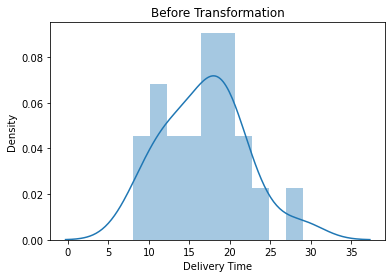

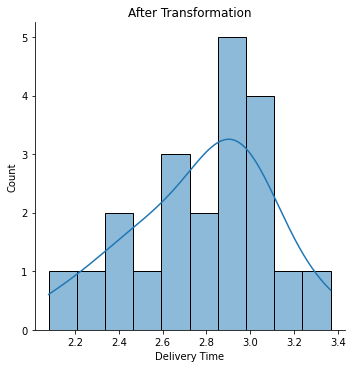

In [ ]:
sns.distplot(dataset['Delivery Time'],bins=10,kde=True)
plt.title('Before Transformation')
sns.displot(np.log(dataset['Delivery Time']),bins=10,kde=True)
plt.title('After Transformation')
plt.show()

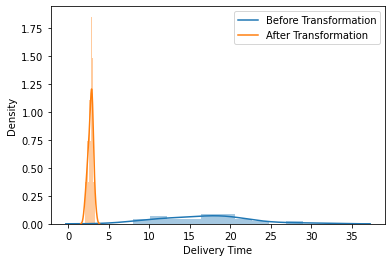

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['Delivery Time'],bins=10,kde=True)
sns.distplot(np.log(dataset['Delivery Time']),bins=10,kde=True)
plt.legend(labels)
plt.show()

**We can see here**

log transformation affects the data as it scales the values down

before prediction it is necessary to reverse scaled the values,

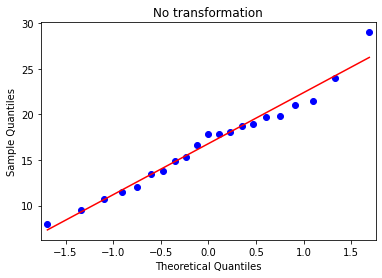

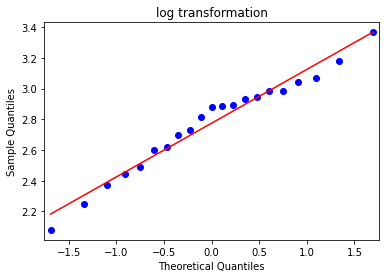

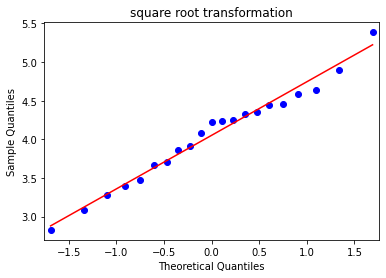

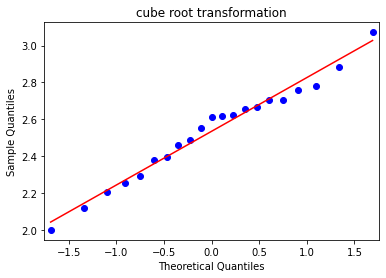

In [ ]:
smf.qqplot(dataset['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Delivery Time']),line='r')
plt.title('log transformation')
smf.qqplot(np.sqrt(dataset['Delivery Time']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dataset['Delivery Time']),line='r')
plt.title('cube root transformation')
plt.show()

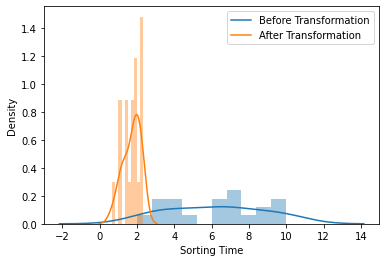

In [ ]:
labels=['Before Transformation','After Transformation']
sns.distplot(dataset['Sorting Time'],bins=10,kde=True)
sns.distplot(np.log(dataset['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

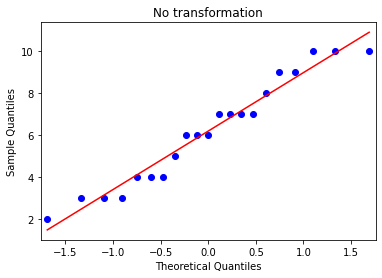

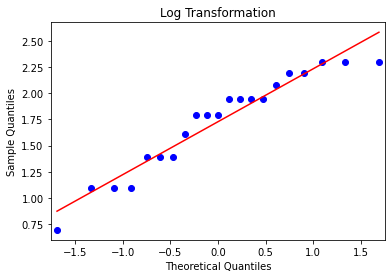

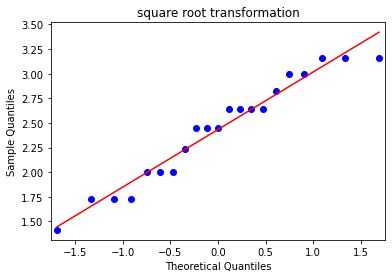

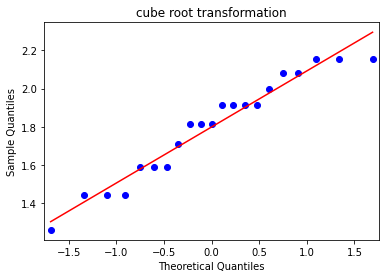

In [ ]:
smf.qqplot(dataset['Sorting Time'],line='r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Sorting Time']),line='r')
plt.title('Log Transformation')
smf.qqplot(np.sqrt(dataset['Sorting Time']),line='r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dataset['Sorting Time']),line='r')
plt.title('cube root transformation')
plt.show()

**Important Note**

we only perform any data transformation when the data is skewed or not normal

**Step 5**

Fitting a Linear Regression Model

Using Ordinary least squares (OLS) regression

It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [ ]:
model = sm.ols('delivery_time~sorting_time',data=dataset1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        17:26:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As you can notice that**

the R-squared and Adjusted R-squared scores are still below 0.85. hence try some another transformation to get score higher

**Square Root transformation on data**

In [ ]:
model1=sm.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)',data=dataset1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 11 Oct 2022   Prob (F-statistic):           8.48e-07
Time:                            17:26:30   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can notice in the above model**

the R-squared and Adjusted R-squared scores are still below 0.85. hence try some another transformation to get score higher

**Cube Root transformation on Data**

In [ ]:
model2=sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)',data=dataset1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 11 Oct 2022   Prob (F-statistic):           4.90e-07
Time:                            17:26:30   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can notice in the above model**

the R-squared and Adjusted R-squared scores are still below 0.85. hence try some another transformation to get score higher

**Log transformation on Data**

In [ ]:
model3=sm.ols('np.log(delivery_time)~np.log(sorting_time)',data=dataset1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 11 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                           17:26:30   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can notice in the above model**

the R-squared and Adjusted R-squared scores are highest scores than the previous model.hence we consider a good model for prediction.

**Step 6**

**Model Testing**

As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

here,intercept(Beta0) value= 6.58

& sorting time(Beta1) value= 1.64

Hypothesis testing of X variable by finding test_stats and P_values for Beta1 i.e if(P_values<0.05; Reject null)


Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)


In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147

(daily) Beta1: tvalue=6.38, pvalue=0.000004

As pvalue(0)<0.05; reject null hyp. thus,X variable(sorting time) has good slope and variance wrt Y variable(Delivery time)

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.


Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [ ]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

**Step 7**

Residual analysis

Test for Normality of Residuals (qq plot)

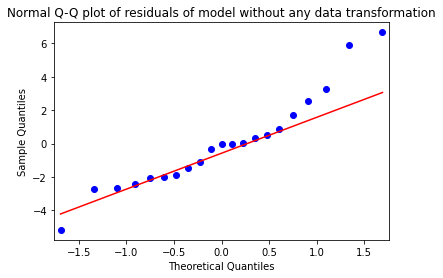

In [ ]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals of model without any data transformation')
plt.show()

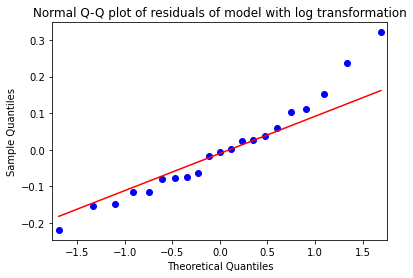

In [ ]:
sm.qqplot(model2.resid, line='q')
plt.title('Normal Q-Q plot of residuals of model with log transformation')
plt.show()

As we can notice in the above plots

1.both the model have slightly different plots

2.the first model is right skewed and doesn't follow normal distribution

3.the second model after log-transformation follows normal distribution with less skewness than first model

**Residual plot to check Homoscedacity or hetroscedacity**

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

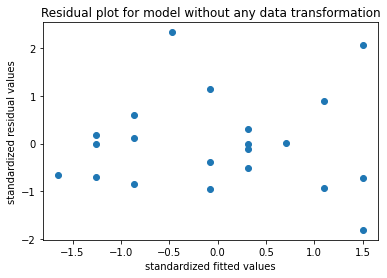

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot for model without any data transformation')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

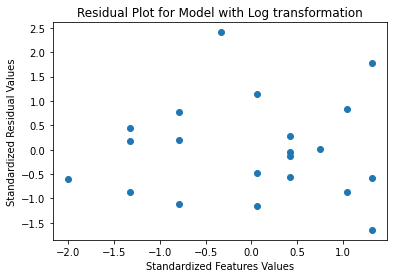

In [ ]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

As we can notice in above plots

1.both the models have homoscedacity

2.the residual and fitted values do not share any pattern

3.hence,there is no relation between the residual and the fitted value. it is randomly distrubed.

**Step 8**

Model validation

Comparing different models with respect to their Root Mean Squared Errors

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model1_pred_y=np.square(model1.predict(dataset1['sorting_time']))
model2_pred_y=pow(model2.predict(dataset1['sorting_time']),3)
model3_pred_y=np.exp(model3.predict(dataset1['sorting_time']))

In [ ]:
model1_rmse=np.sqrt(mean_squared_error(dataset1['delivery_time'],model1_pred_y))
model2_rmse=np.sqrt(mean_squared_error(dataset1['delivery_time'],model2_pred_y))
model3_rmse=np.sqrt(mean_squared_error(dataset1['delivery_time'],model3_pred_y))
print('model1=',np.sqrt(model.mse_resid),'\n' 'model1=',model1_rmse,'\n' 'model2=',model2_rmse, '\n' 'model3=',model3_rmse)

model1= 2.934903768890139 
model1= 2.762294279320867 
model2= 2.755584309893576 
model3= 2.745828897614548


In [ ]:
data={'model':np.sqrt(model.mse_resid),'model1':model1_rmse,'model2':model3_rmse,'model3':model3_rmse}
min(data,key=data.get)

'model2'

**model2 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values**

Model2 is the model where we did log transformation on both dependent variable as well as on independent variable

**Step 9**

predicting the values from model with log transformation on the data

In [ ]:
predicted=pd.DataFrame()
predicted['sorting_time']=dataset1.sorting_time
predicted['delivery_time']=dataset1.delivery_time
predicted['predicted_delivery_time']=pd.DataFrame(np.exp(model2.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,predicted_delivery_time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [ ]:
predicted1=pd.DataFrame()
predicted1['sorting_time']=dataset1.sorting_time
predicted1['delivery_time']=dataset1.delivery_time
predicted1['predicted_delivery_time']=pd.DataFrame(np.exp(model3.predict(predicted1.sorting_time)))
predicted1

,sorting_time,delivery_time,predicted_delivery_time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
